##  Week 4: Probability Mass Functions and Cumulative Distribution Functions

*  Student Name: Abraham Abate
*  Instructor: Cary Jim
*  DSC 530: Data Exploration and Analysis
*  Data Science Dept., BU
*  Date: 06/29/2024

In [4]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [5]:
# pip install empiricaldist

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf
from empiricaldist import Cdf
from statistics import variance

In [7]:
# Read NSFG data, and necessary call and function
import nsfg
import first
import thinkstats2
import thinkplot


## Excerise 3.1:
* Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
* Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
* Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.
* Plot the actual and biased distributions, and compute their means. 



In [8]:
# Read the Response Female Dataset
fem_resp = nsfg.ReadFemResp()
fem_resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [9]:
# check the variable NUMKDHH
fem_resp.numkdhh

0       3
1       0
2       0
3       0
4       0
       ..
7638    0
7639    0
7640    0
7641    0
7642    0
Name: numkdhh, Length: 7643, dtype: int64

In [10]:
# Count the number of times each value occurs.
num_kids = fem_resp.numkdhh.value_counts()
num_kids


0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64

In [11]:
# convert value_counts to df 
num_kids = pd.DataFrame(num_kids)
num_kids = num_kids.reset_index()

# assign new names to the columns
num_kids.columns = ['# Children', 'Count']
num_kids

,# Children,Count
0,0,3563
1,1,1636
2,2,1500
3,3,666
4,4,196
5,5,82



Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.



In [12]:
# compute the pmf
pmf = thinkstats2.Pmf(fem_resp.numkdhh)
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318})

In [13]:
# Pmf.from_seq takes any kind of sequence – like a list, tuple, or Pandas Series – and 
# computes the distribution of the values.
pmf_num_child = Pmf.from_seq(fem_resp.numkdhh, normalize=False)
pmf_num_child

,probs
0,3563
1,1636
2,1500
3,666
4,196
5,82


In [14]:
# get fraction of respondents with each value- Number of child in HH
pmf_numChild_norm = Pmf.from_seq(fem_resp.numkdhh, normalize=True)
pmf_numChild_norm

,probs
0,0.466178
1,0.214052
2,0.196258
3,0.087139
4,0.025644
5,0.010729


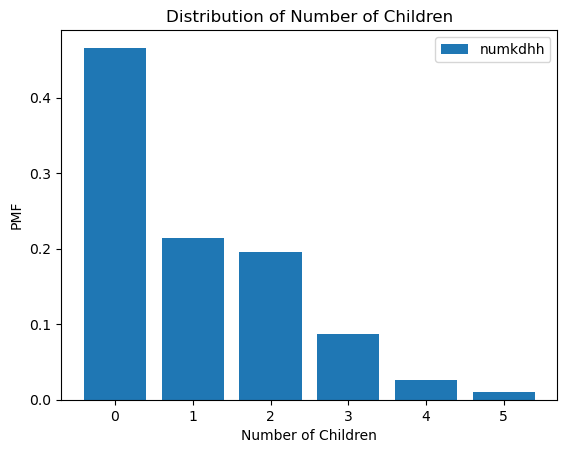

In [15]:
# plots the values and their probabilities as a bar chart.
pmf_numChild_norm.bar(label='numkdhh')
plt.xlabel("Number of Children")
plt.ylabel('PMF')
plt.title('Distribution of Number of Children')
plt.legend();

In [16]:
# computes the biased PMF
def BiasPmf(pmf, label="observed"):
    new_pmf = pmf.Copy(label="observed")

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

# Biased pmf from the biased distribution
biased_pmf = BiasPmf(pmf, label="observed")

Plot the actual and biased distributions, and compute their means.

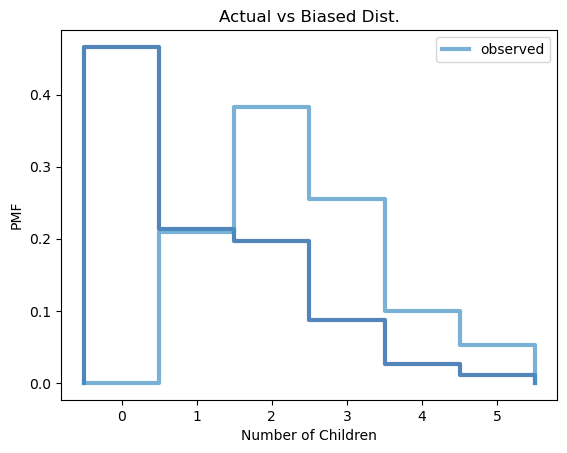

In [17]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Number of Children", ylabel="PMF", title = "Actual vs Biased Dist.")

In [18]:
# Calculate the Mean number of children
act_mean = print("Actual mean", pmf.Mean())
act_mean
print("Observed mean", biased_pmf.Mean())
act_var = print("Actual var", np.var(pmf))
act_var

Actual mean 1.024205155043831
Observed mean 2.403679100664282
Actual var 2.9166666666666665


Note: 
* The observed mean number of children under 18 (including themselves) in household is substantially higher than the actual.

## Excerise 3.2:

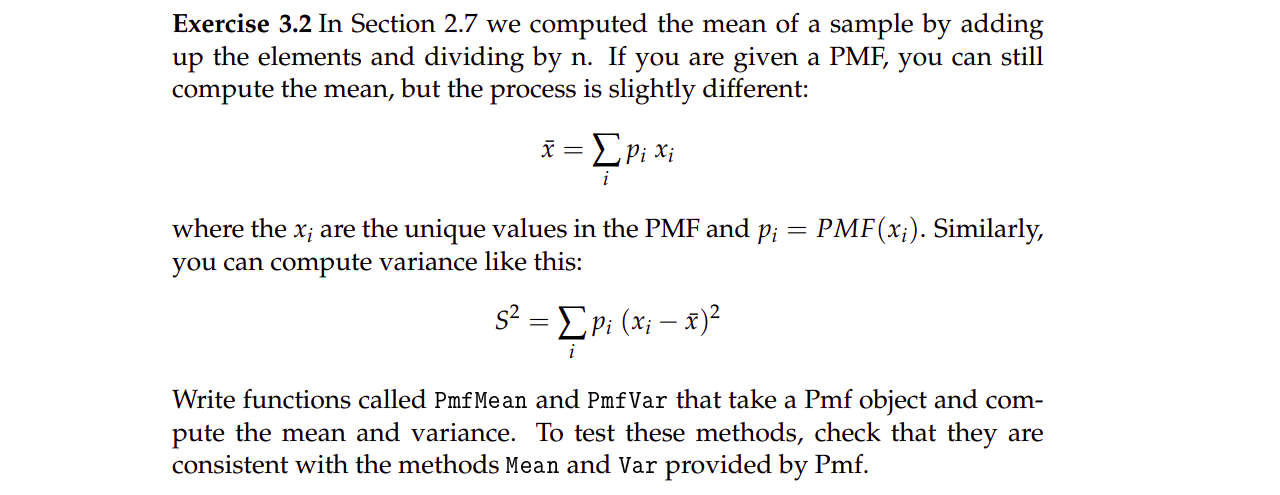


In [19]:
# convert pmf to a df
# The function Pmf.from_seq takes any kind of sequence – like a list, tuple, or Pandas Series
pmf = Pmf.from_seq(fem_resp.numkdhh)

In [20]:
# create functions --PmfMean and PmfVar that take a Pmf object and compute the mean and variance
def PmfMean(pmf):

    mean = sum(p * x for x, p in pmf.items())
    
    return mean

In [21]:
def PmfVar(pmf):

    meanPmf = PmfMean(pmf)
    
    var = sum( (p * (x - meanPmf) ** 2) for x, p in pmf.items())
    
    return var

In [22]:
# To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf
fun_calc_mean = PmfMean(pmf)
fun_calc_var = PmfVar(pmf)


if act_mean != fun_calc_mean:
    print("Results matches")
else:
    print("Results NOT matches")
    

if act_var != fun_calc_var:
    print("Results matches")
else:
    print("Results NOT matches")

Results matches
Results matches


## Exercise 4

Exercise 4.1 How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.



In [23]:
# create a variable for NSFG data (all live births)
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live_wt = live.totalwgt_lb

In [24]:
# computes the CDF of the values using Cdf.from_seq function
cdf_live = Cdf.from_seq(live_wt)

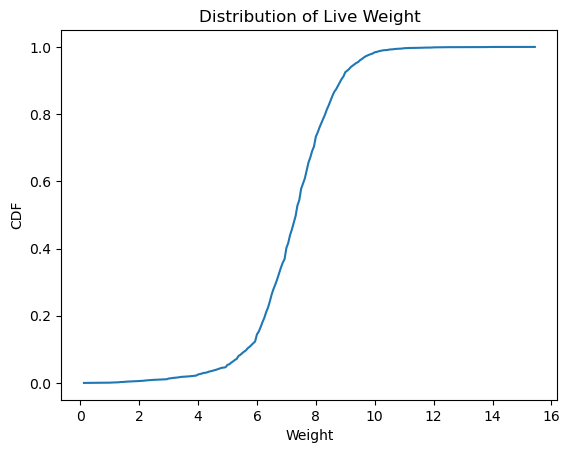

In [25]:
# Plot the CDF as a line
cdf_live.plot()

plt.xlabel('Weight')
plt.ylabel('CDF')
plt.title('Distribution of Live Weight');

In [26]:
# create a function to compute the percentile rank.
def PercentileRank(weights, new_wt):
    count = 0
    for weight in weights:
        if weight <= new_wt:
            count += 1

    percentile_rank = 100.0 * count / len(weights)
    return percentile_rank

In [27]:
# Weights of firstborn child
first_wt = preg[preg.birthord == 1]
first_wt['totalwgt_lb']

0        8.8125
2        9.1250
5        8.5625
8        7.5625
10       7.8125
          ...  
13576    6.4375
13578    6.0000
13581    6.3750
13584    6.3750
13588    6.1875
Name: totalwgt_lb, Length: 4413, dtype: float64

In [28]:
# get percentile rank for weight = 7.0 lbs
new_rank = PercentileRank(first_wt['totalwgt_lb'], 7.0)
new_rank

41.33242692046227

##### Interpretation: 
* For birth weight of 7.0 lbs, I am only in the 41th percentile. This means 41% of the first born children had a birthweight of 7 lb and less.

Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [29]:
# Import library
import random

In [37]:
# generate random numbers using random.random function
random_nums = np.random.random(1000)

In [44]:
# PMF of a random numbers
random_nums_pmf = Pmf.from_seq(random_nums)
random_nums_pmf

,probs
0.000042,0.001
0.001637,0.001
0.001858,0.001
0.002293,0.001
0.002545,0.001
...,...
0.996822,0.001
0.997504,0.001
0.997905,0.001
0.997982,0.001


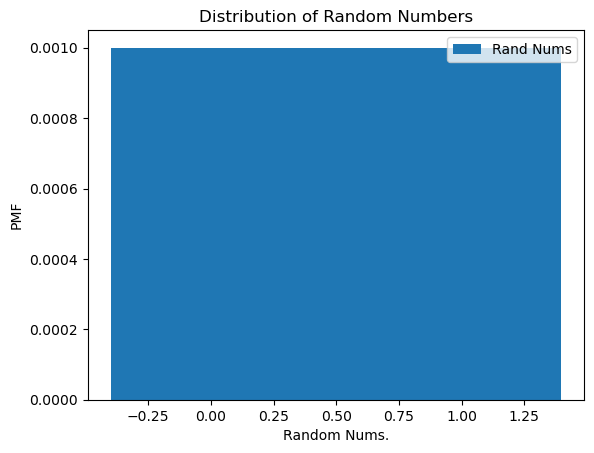

In [50]:
# Plot the PMF
random_nums_pmf.bar(label='Rand Nums')

plt.xlabel('Random Nums.')
plt.ylabel('PMF')
plt.title('Distribution of Random Numbers')
plt.legend();

In [51]:
# CDF of the random numbers
cdf_random_nums = Cdf.from_seq(random_nums)
cdf_random_nums

,probs
0.000042,0.001
0.001637,0.002
0.001858,0.003
0.002293,0.004
0.002545,0.005
...,...
0.996822,0.996
0.997504,0.997
0.997905,0.998
0.997982,0.999


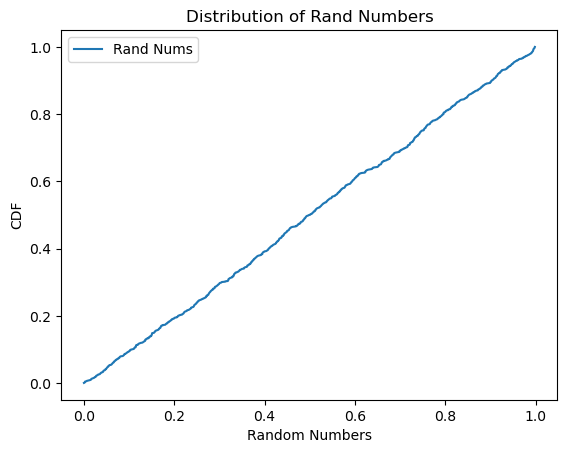

In [52]:
# Plot the CDF
cdf_random_nums.plot(label='Rand Nums')

plt.xlabel('Random Numbers') 
plt.ylabel('CDF')
plt.title('Distribution of Rand Numbers')
plt.legend();

Is the distribution uniform?
* Yes, the random numbers distribution is uniform as the PMF shows the same probablity for each number. A uniform distribution, also known as an equally likely distribution, occurs when each value in a given range has the same probability of being selected.